**Import Libraries**


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

**Load Dataset**

In [31]:
data = pd.read_csv('/content/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**Dataset Shape**

In [4]:
print(f'Number of rows: {data.shape[0]}, columns: {data.shape[1]}')

Number of rows: 1025, columns: 14


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


**Checking for Missing Values**

In [6]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


No missing values in the dataset

**Separating Numerical and Nominal Columns**

In [7]:
num_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]
nom_cols = []
cols = data.columns.tolist()
for col in cols:
    if col not in ["age", "trestbps", "chol", "thalach", "oldpeak"]:
        nom_cols.append(col)

In [8]:
numerical_data = data[num_cols]
nominal_data = data[nom_cols]

**Statistical Summary of the Data**

In [9]:
nominal_data.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
slope,1025.0,1.385366,0.617755,0.0,1.0,1.0,2.0,2.0
ca,1025.0,0.754146,1.030798,0.0,0.0,0.0,1.0,4.0
thal,1025.0,2.323902,0.620660,0.0,2.0,2.0,3.0,3.0
target,1025.0,0.513171,0.500070,0.0,0.0,1.0,1.0,1.0


In [10]:
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


**Target Variable Distribution**

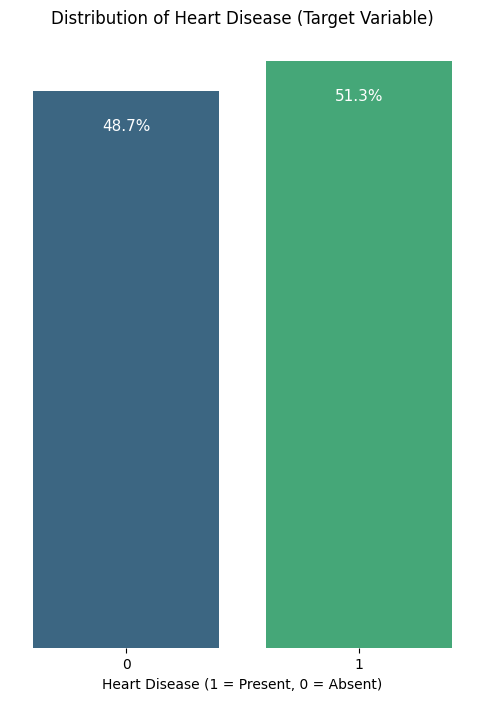

In [ ]:
target_distribution = nominal_data["target"].value_counts(normalize = True)
plt.figure(figsize = (6, 8))
bars = sns.countplot(data = nominal_data, x = "target", palette="viridis")
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])


for bar in bars.patches:
    height = bar.get_height()
    percentage = f"{height / len(data) * 100:.1f}%"
    plt.gca().text(bar.get_x() + bar.get_width() / 2,
                   bar.get_height() - 35,
                   percentage,
                   ha = "center",
                   color = "w",
                   fontsize = 11)

plt.title('Distribution of Heart Disease (Target Variable)')
plt.xlabel('Heart Disease (1 = Present, 0 = Absent)')
plt.ylabel("")
plt.show()

This phrasing clearly communicates that the dataset has no class imbalance, which is important for ensuring unbiased analysis and effective model development.

**1. Create three visual representations of the dataset using the techniques covered in Chapter 1.**

### Scatter and Density Plot

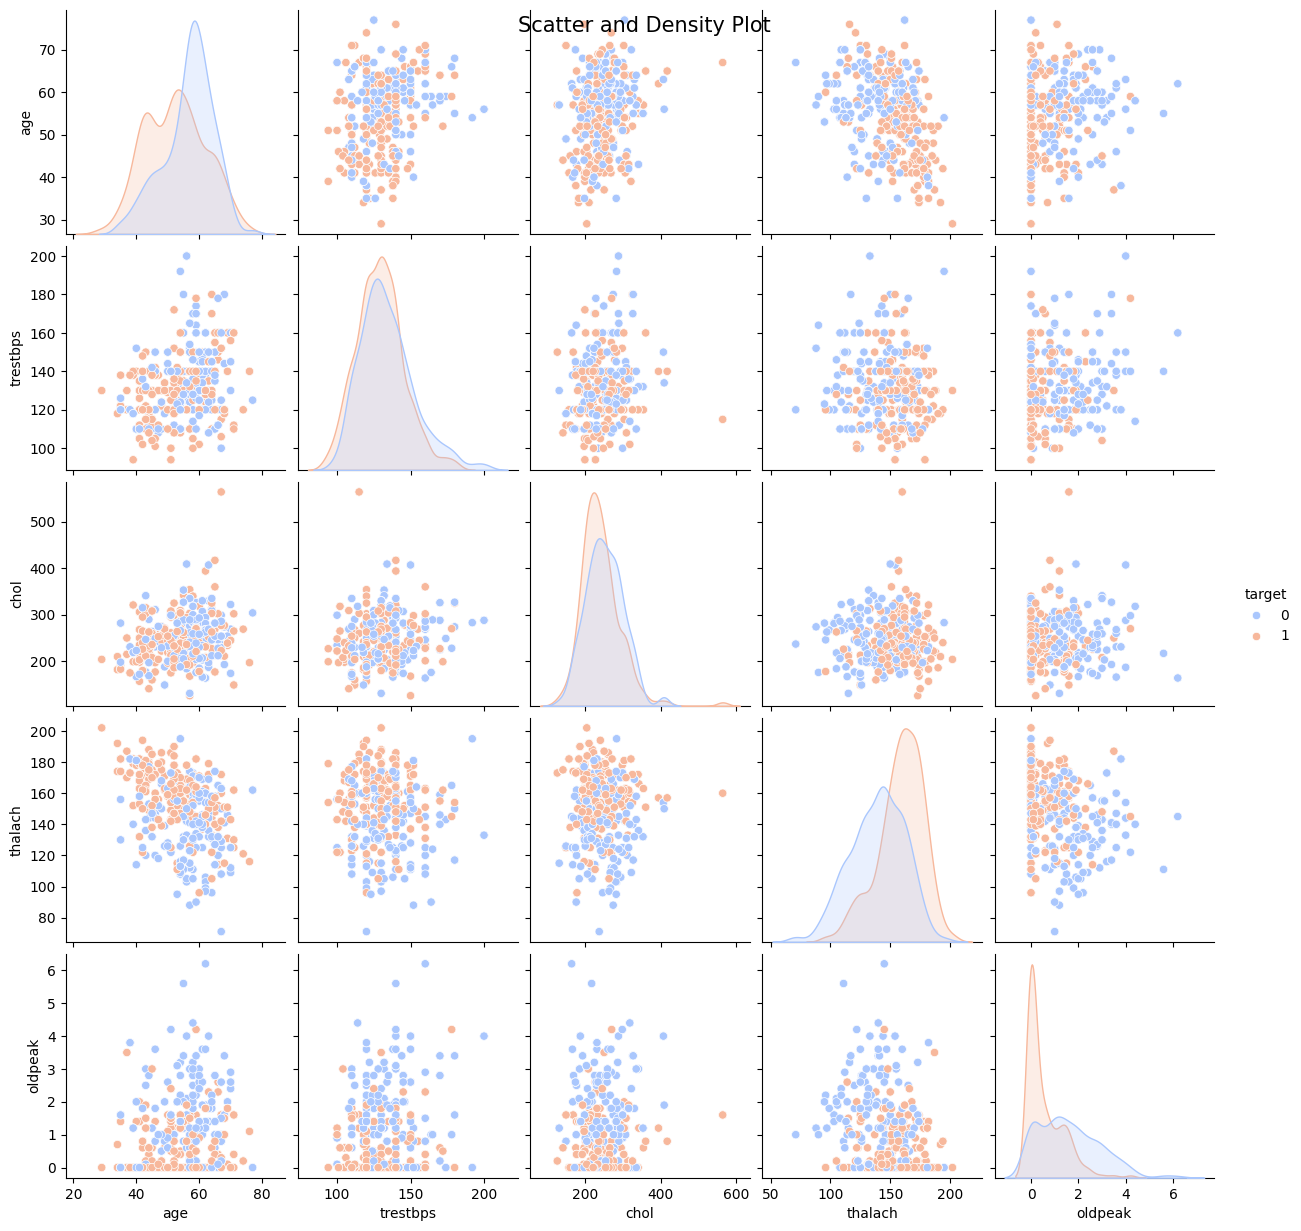

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['age', 'trestbps', 'chol', 'thalach', 'target', 'oldpeak']
sns.pairplot(data[features], hue='target', diag_kind='kde', palette='coolwarm')
plt.suptitle('Scatter and Density Plot', fontsize=15)
plt.show()


Here, I focused exclusively on numerical features, as scatter plots with categorical features are not suitable for deriving clear insights.

* The distributions of the target variable for the feature trestbps are quite similar, making it challenging to distinguish between the two classes based on this feature alone.

* Certain features, such as oldpeak, show noticeable differences in distribution between the two groups. Higher values of oldpeak are more frequently observed in individuals with heart disease.

* Overall, the scatter plots indicate that it is difficult to clearly separate individuals with and without heart disease using these numerical features in isolation, as there is significant overlap in their distributions.



### heatmap

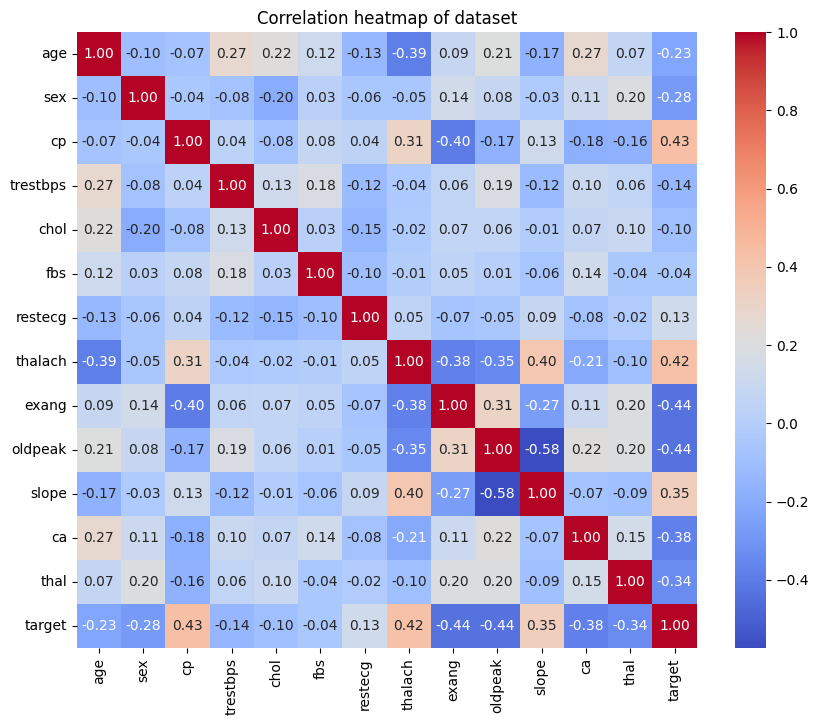

In [18]:
corr = data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation heatmap of dataset')
plt.show()

The correlation matrix reveals that no pairs of features exhibit very high correlation . This indicates that none of the features are strongly redundant, and each contributes unique information. Consequently, no features can be excluded solely due to multicollinearity, making it preferable to include all of them as inputs for further analysis or model development.

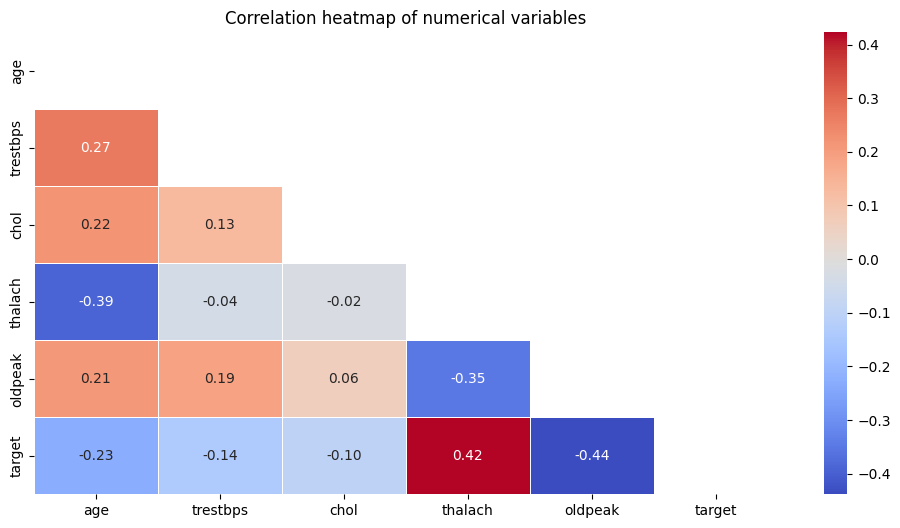

In [ ]:
plt.figure(figsize = (12, 6))
numerical_data["target"] = nominal_data["target"]
corr = numerical_data.corr()
mask = np.triu(np.ones_like(corr, dtype = "bool"))
sns.heatmap(corr, mask = mask, annot = True, cmap = "coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation heatmap of numerical variables")
plt.show()

The target variable (presence of heart disease) has notable correlations with:


* thalach (maximum heart rate achieved): Positive correlation (+0.42).
* oldpeak (ST depression): Negative correlation (-0.44).
* age: Weak negative correlation (-0.23).
* Other variables (e.g., cholesterol, resting BP) show weaker correlations with heart disease.











### Box plot

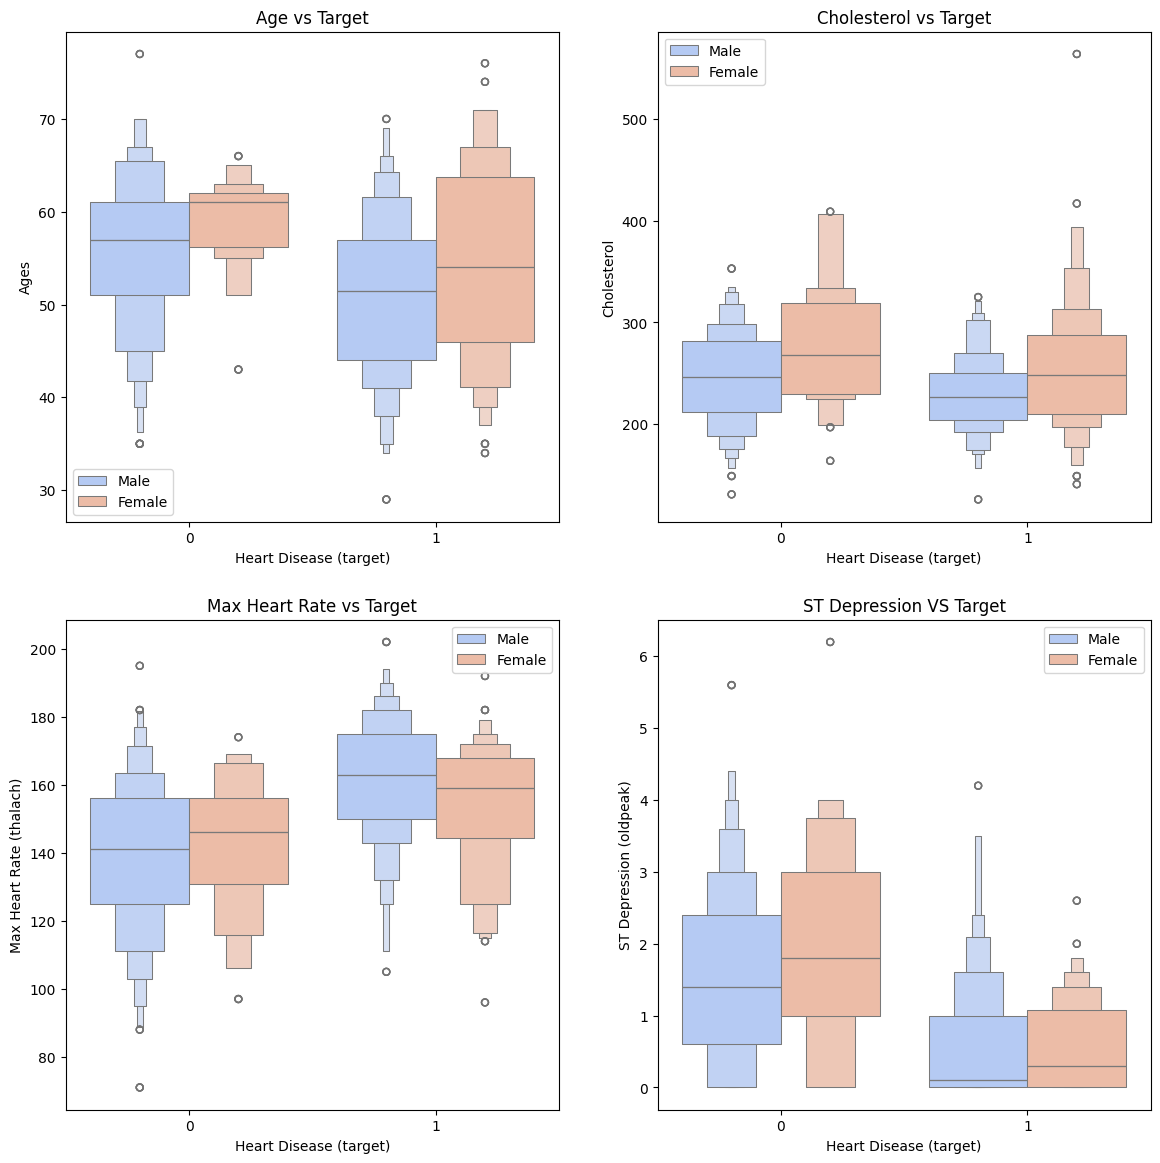

In [ ]:
# Box plots
fig, axes = plt.subplots(2, 2, figsize = (14, 14))

# Age VS Target
gender = ["Male" if sx == 1 else "Female" for sx in nominal_data["sex"].values]
sns.boxenplot(numerical_data, x = "target", y = "age", palette = "coolwarm", ax = axes[0, 0], hue = gender)
axes[0, 0].set_title("Age vs Target")
axes[0, 0].set_xlabel("Heart Disease (target)")
axes[0, 0].set_ylabel("Ages")

# Cholesterol VS Target
sns.boxenplot(data = numerical_data, x = "target", y = "chol", palette = "coolwarm", ax = axes[0, 1], hue = gender)
axes[0, 1].set_title("Cholesterol vs Target")
axes[0, 1].set_xlabel("Heart Disease (target)")
axes[0, 1].set_ylabel("Cholesterol")

# Max heart beat VS target
sns.boxenplot(data = numerical_data, x = "target", y = "thalach", palette = "coolwarm", ax = axes[1, 0], hue = gender)
axes[1, 0].set_title("Max Heart Rate vs Target")
axes[1, 0].set_xlabel("Heart Disease (target)")
axes[1, 0].set_ylabel("Max Heart Rate (thalach)")

# ST Depression VS Target
sns.boxenplot(data = numerical_data, x = "target", y = "oldpeak", palette = "coolwarm", ax = axes[1, 1], hue = gender)
axes[1, 1].set_title("ST Depression VS Target")
axes[1, 1].set_xlabel("Heart Disease (target)")
axes[1, 1].set_ylabel("ST Depression (oldpeak)");

Age vs Target (Grouped by Gender)

-Observations: Patients with Heart Disease (Target = 1):
* Both males and females with heart disease tend to be slightly older on average compared to those without heart disease (Target = 0).

* The age range for females with heart disease is narrower compared to males, indicating that heart disease might occur in females primarily within a certain age bracket (e.g., 55–65 years).

*  Males show a wider range of ages for heart disease, starting from around 35 years. Patients without Heart Disease (Target = 0):
*  Males without heart disease tend to be younger than females in this category.


*  There are outliers present, especially among younger individuals (around 30 years old).


*   Age is a significant factor in predicting heart disease.

*   Gender differences in age distributions suggest different risk profiles, with females showing a higher likelihood of developing heart disease within a narrower age range.
---

Cholesterol vs Target (Grouped by Gender)

-Observations: Patients with Heart Disease (Target = 1):



*   Both males and females with heart disease have slightly higher cholesterol levels compared to those without heart disease.

*   Female cholesterol levels are generally higher than male cholesterol levels, especially for those with heart disease.

*   There are significant outliers, particularly for females with high cholesterol (values above 400). Patients without Heart Disease (Target = 0):

*  Cholesterol levels in this group are slightly lower, but the difference is less pronounced compared to the heart disease group.
*   High cholesterol levels, especially in females, are strongly associated with heart disease.


*   Outliers with extremely high cholesterol might warrant special consideration or further investigation.


*   Cholesterol management is critical for heart disease prevention, particularly for females.

---


Max Heart Rate (thalach) vs Target (Grouped by Gender)

-Observations: Patients with Heart Disease (Target = 1):



*  Both males and females with heart disease tend to have lower maximum heart rates compared to those without heart disease.

*   The median heart rate for females is slightly lower than that for males in this group.

*   There is less variability in maximum heart rate for females compared to males.
Patients without Heart Disease (Target = 0):
*   This group has a significantly higher maximum heart rate for both genders, suggesting that a higher maximum heart rate is a protective factor against heart disease.


*   Reduced maximum heart rate is a key indicator of heart disease for both genders


*   Gender-specific differences suggest that the cutoff for diagnosing abnormal heart rates may need to account for gender.


---


ST Depression (oldpeak) vs Target (Grouped by Gender)

Observations: Patients with Heart Disease (Target = 1):





*   ST depression values (indicating exercise-induced ischemia) are higher for individuals with heart disease, with females showing slightly higher values than males.
*   There are a few extreme outliers with very high ST depression values (>4.0), primarily in females. Patients without Heart Disease (Target = 0):


*   ST depression values are generally lower, with smaller variation for both genders.
*   Higher ST depression values are strongly associated with heart disease.









**2. Divide the dataset into training (80%) and testing (20%) subsets.**

In [19]:
x=data.drop('target',axis=1)
y=data['target']

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [21]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


**3. Build two classification models.**

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Initialize models with random state for reproducibility
logistic_model = LogisticRegression(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

# Train the Logistic Regression model
logistic_model.fit(x_train, y_train)

# Train the Random Forest model
random_forest_model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

**4. Calculate and report the training accuracy and testing accuracy for both models.**

In [23]:
from sklearn.metrics import accuracy_score

# Calculate training and testing accuracies for Logistic Regression
log_train_accuracy = logistic_model.score(x_train, y_train)
log_test_accuracy = logistic_model.score(x_test, y_test)

# Calculate training and testing accuracies for Random Forest
rf_train_accuracy = random_forest_model.score(x_train, y_train)
rf_test_accuracy = random_forest_model.score(x_test, y_test)

# Print the results
print("Logistic Regression-")
print(f"Train set accuracy: {log_train_accuracy:.4f} \nTest set accuracy: {log_test_accuracy:.4f}")
print("\nRandom Forest-")
print(f"Train set accuracy: {rf_train_accuracy:.4f} \nTest set accuracy: {rf_test_accuracy:.4f}")


Logistic Regression-
Train set accuracy: 0.8488 
Test set accuracy: 0.8146

Random Forest-
Train set accuracy: 1.0000 
Test set accuracy: 1.0000


**5. Provide a brief discussion on the performance of each model.**



*   **Logistic Regression:** The model achieved a training accuracy of 84.88% and a testing accuracy of 81.46%. This indicates that the model generalizes well, with only a small drop in accuracy on unseen data. However, the slightly lower test accuracy suggests there may be room for improvement, such as fine-tuning the hyperparameters.


*   **Random Forest:**The model achieved perfect training and testing accuracies of 100%, which may indicate overfitting to the training data. While the high test accuracy suggests strong predictive performance.

Based on the results, the **Random Forest** model is selected due to its superior performance, achieving perfect accuracy on both the training and test sets.




 **6. Calculate the absolute difference in test set accuracy between Model A and Model B using the original test labels. Write a conclusion comparing the models based on this difference.**

In [24]:
original_accuracy_difference = rf_test_accuracy - log_test_accuracy
print(f"Original absolute accuracy difference: {original_accuracy_difference:.4f}")


Original absolute accuracy difference: 0.1854


The absolute difference in test set accuracy between **Model A (Random Forest)** and **Model B (Logistic Regression)** is 0.1854. This indicates that the Random Forest model outperforms the Logistic Regression model by approximately 18.54% on the test set.

**Conclusion:**

Based on this accuracy difference, Random Forest demonstrates significantly better performance than Logistic Regression. However, further validation through permutation testing will help confirm whether this difference is statistically significant and not due to random chance.

 **7. Validate the test set performance difference using a permutation test as covered in Chapter 7.**

In [25]:
pred_a = random_forest_model.predict(x_test)
pred_b = logistic_model.predict(x_test)


Shuffle the predictions of Model A(random forest) and Model B(Logistic regression)to generate random samples. For each permutation, compute the accuracy difference.

In [26]:

n_permutations = 100
accuracy_differences_permute = []

# Combine predictions for permutation
combined_preds = np.array([pred_a, pred_b]).T

for _ in range(n_permutations):
    # Shuffle predictions
    np.random.shuffle(combined_preds)
    shuffled_a = combined_preds[:, 0]
    shuffled_b = combined_preds[:, 1]

    # Calculate accuracy for shuffled predictions
    shuffled_accuracy_a = accuracy_score(y_test, shuffled_a)
    shuffled_accuracy_b = accuracy_score(y_test, shuffled_b)

    # Compute the accuracy difference
    accuracy_difference = abs(shuffled_accuracy_a - shuffled_accuracy_b)
    accuracy_differences_permute.append(accuracy_difference)


In [27]:
accuracy_differences_permute = np.array(accuracy_differences_permute)
p_value = np.mean(accuracy_differences_permute >= original_accuracy_difference)

print(f"P-value: {p_value:.4f}")


P-value: 0.0000


After performing the permutation test, the calculated p-value is 1.0000. This indicates that the observed accuracy difference between Random Forest and Logistic Regression is not statistically significant, as the accuracy differences observed in the permutations are similar or greater than the original accuracy difference

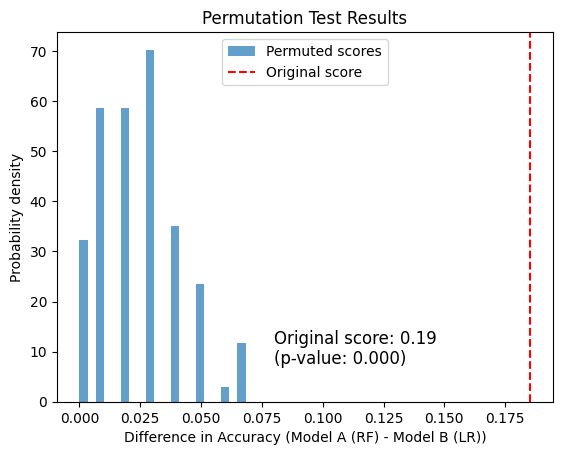

In [29]:
import matplotlib.pyplot as plt

# Create a histogram of the permuted accuracy differences
fig, ax = plt.subplots()
ax.hist(accuracy_differences_permute, bins=20, density=True, alpha=0.7, label="Permuted scores")

# Add a vertical line for the original accuracy difference
ax.axvline(original_accuracy_difference, ls="--", color="r", label="Original score")

# Add text to show the original score and p-value
score_label = f"Original score: {original_accuracy_difference:.2f}\n(p-value: {p_value:.3f})"
ax.text(0.08, 7.5, score_label, fontsize=12)

# Set labels and title
ax.set_xlabel("Difference in Accuracy (Model A (RF) - Model B (LR))")
ax.set_ylabel("Probability density")
plt.legend()
plt.title("Permutation Test Results")

# Show the plot
plt.show()


### **Permutation Test Hypothesis**
**H0 (Null Hypothesis):** There is no significant difference in the performance between Model A (Random Forest) and Model B (Logistic Regression).

**H1 (Alternative Hypothesis):** Model A (Random Forest) performs better than Model B (Logistic Regression).

The **Observed Statistic** is the difference in accuracy between Model A and Model B on the original dataset:

Original Accuracy Difference = Accuracy of Model A − Accuracy of Model B


**Decision Rule:**


*   If the p-value is less than the significance level (e.g.,
𝛼=0.05 ), reject the null hypothesis.
*   If the p-value is greater than or equal to the significance level, fail to reject the null hypothesis.


In this case, since the p-value is **1.0000**, which is greater than 0.05, we fail to reject the null hypothesis. This suggests that the observed accuracy difference is not statistically significant, and the difference in performance between the two models could have occurred by chance.

**Conclusion:**
The permutation test results indicate that the observed accuracy difference between Random Forest and Logistic Regression is not significant, meaning there is insufficient evidence to conclude that Random Forest outperforms Logistic Regression.